# Seattle Weather Data 1948-2017

In [1]:
# Render plots inline as output (SHOW STUDENTS WHAT THIS LOOKS LIKE WITHOUT IT)
%matplotlib inline

# Global imports for the notebook
# NOTE: Rerun the complete notebook when imports are changed
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date

In [2]:
# Read in the weather csv file
df = pd.read_csv('./seattleWeather_1948-2017.csv')
# Print the first five lines - ensure students know this is a 'peek'
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [3]:
#Converting the date to datetime object; allows the use of `.dt` further along
df['DATE'] = pd.to_datetime(df['DATE'], errors = 'coerce')

## NOTE: Scott made a change here to how we're handling datetime info... 

In [4]:
# Adds new columns to the data frame, all based on the datetime object in `DATE`, which we can analyze later on
df['DAY_NAME'] = df['DATE'].dt.weekday_name
df['DAY_OF_WEEK'] = df['DATE'].apply(date.isoweekday)
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['DAY'] = df['DATE'].dt.day
df['RAIN'] = df['RAIN'].apply(lambda x: 1 if x == True else 0)

In [5]:
# Print the head again so we can observer our changes
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,DAY_NAME,DAY_OF_WEEK,MONTH,YEAR,DAY
0,1948-01-01,0.47,51,42,1,Thursday,4,1,1948,1
1,1948-01-02,0.59,45,36,1,Friday,5,1,1948,2
2,1948-01-03,0.42,45,35,1,Saturday,6,1,1948,3
3,1948-01-04,0.31,45,34,1,Sunday,7,1,1948,4
4,1948-01-05,0.17,45,32,1,Monday,1,1,1948,5


In [6]:
# This is a built-in that provides some basic statistics on the data... Might be useful, maybe not?
df.describe()

,PRCP,TMAX,TMIN,RAIN,DAY_OF_WEEK,MONTH,YEAR,DAY
count,25548.000000,25551.000000,25551.000000,25551.000000,25551.0,25551.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226,0.426598,4.0,6.519197,1982.476694,15.725060
std,0.239031,12.772984,8.892836,0.494592,2.0,3.447046,20.193095,8.800395
min,0.000000,4.000000,0.000000,0.000000,1.0,1.000000,1948.000000,1.000000
25%,0.000000,50.000000,38.000000,0.000000,2.0,4.000000,1965.000000,8.000000
50%,0.000000,58.000000,45.000000,0.000000,4.0,7.000000,1982.000000,16.000000
75%,0.100000,69.000000,52.000000,1.000000,6.0,10.000000,2000.000000,23.000000
max,5.020000,103.000000,71.000000,1.000000,7.0,12.000000,2017.000000,31.000000


In [7]:
# Another handy built-in that lets you take a look at how the dataframe is being constructed (should remind you of a SQL Table)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 10 columns):
DATE           25551 non-null datetime64[ns]
PRCP           25548 non-null float64
TMAX           25551 non-null int64
TMIN           25551 non-null int64
RAIN           25551 non-null int64
DAY_NAME       25551 non-null object
DAY_OF_WEEK    25551 non-null int64
MONTH          25551 non-null int64
YEAR           25551 non-null int64
DAY            25551 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 1.9+ MB


In [8]:
# Do a quick count of the diff between rain and no rain, 
# represented as True: 1 or False: 0
diff = pd.DataFrame(data=df.RAIN.groupby(df.RAIN).count())
# Above, we passed a raw output into a new DataFrame!
diff

,RAIN
RAIN,
0,14651
1,10900


In [9]:
# Take a look at the days of the week, and we can see that there's really no meaningful difference when it comes to the day.
rain = df[df.RAIN == True].groupby(df.DAY_NAME)
rain['DAY_NAME'].count()

DAY_NAME
Friday       1559
Monday       1568
Saturday     1584
Sunday       1564
Thursday     1552
Tuesday      1561
Wednesday    1512
Name: DAY_NAME, dtype: int64

In [10]:
# However, looking at the months, we can definitely see a difference! 
months_wet = df[df.RAIN == True].groupby(df.MONTH)
months_wet['MONTH'].count()

MONTH
1     1298
2     1103
3     1212
4      998
5      771
6      632
7      343
8      413
9      609
10     950
11    1264
12    1307
Name: MONTH, dtype: int64

# Visualizations with matplotlib

## Quick rendering of our original rain diff

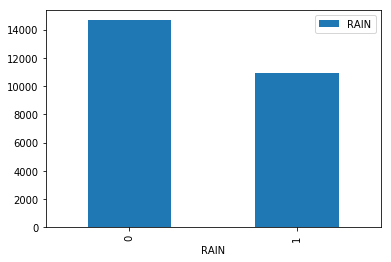

In [11]:
diff.plot(kind='bar')

## Quick rendering of our rain per day of the week (not much to look at)

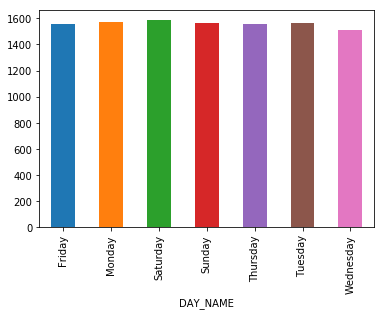

In [12]:
rain['DAY_NAME'].count().plot(kind='bar')

## Review the rainy totals per month... a little more interesting!

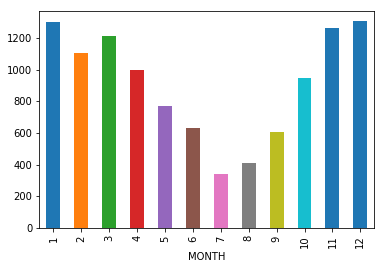

In [13]:
months_wet['MONTH'].count().plot(kind='bar')

# A little more complicated data viz...

### Lets take a quick look at the temperature diffs (TMAX vs TMIN) over the whole data set by year

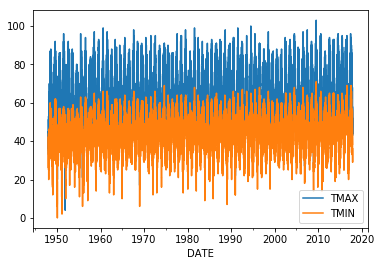

In [14]:
# If you don't want warnings, suppress them. Ignore your conscience.  This can kinda be a bad thing!
import warnings
warnings.filterwarnings('ignore')

df.plot(x='DATE', y=['TMAX', 'TMIN'])

### Scatter plot showing the precipitation per year for all data

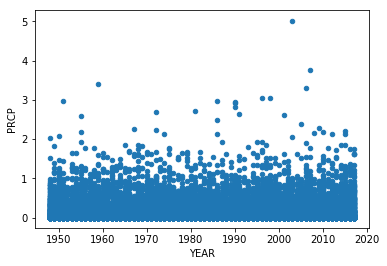

In [25]:
df.plot(x='YEAR', y='PRCP', kind='scatter')

### Scatter plot showing the precipitation per year since 2001

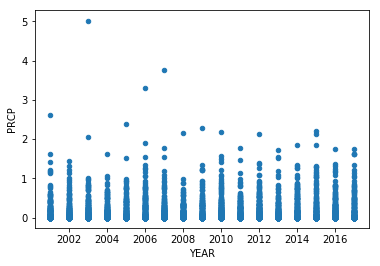

In [24]:
df[df.YEAR > 2000].plot(x='YEAR', y='PRCP', kind='scatter')

### Scatter plot showing the precipitation per month for all years

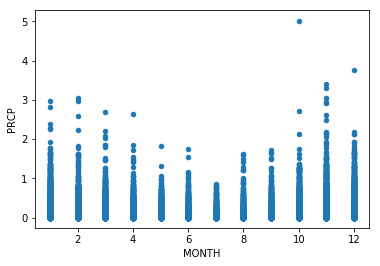

In [26]:
df[['MONTH', 'PRCP']].plot(x='MONTH', y='PRCP', kind='scatter')

# Probabilities

## What's the probability that it will Rain or Not on any given day in Seattle?

In [15]:
df['RAIN'].sum() / df['RAIN'].count()

0.4265977848225118

In [16]:
df.head(4)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY_NAME,DAY_OF_WEEK,MONTH,YEAR,DAY
0,1948-01-01,0.47,51,42,1,Thursday,4,1,1948,1
1,1948-01-02,0.59,45,36,1,Friday,5,1,1948,2
2,1948-01-03,0.42,45,35,1,Saturday,6,1,1948,3
3,1948-01-04,0.31,45,34,1,Sunday,7,1,1948,4


## What's the probability that it will rain on April 1st?

**We can derive below that there is a roughly 61% chance that it will rain on April 1st**

In [17]:
# df.loc[df['MONTH'] == 4 & df['DAY'] == 1]
apr = df[df.MONTH == 4][df.DAY == 1]
perc = apr['RAIN'].sum() / apr.count()
perc['RAIN']

0.6142857142857143

# What's the probability that it will rain when the Max temp is above 80 degrees?

In [18]:
max_temp = df[df.TMAX > 79]
max_temp.head(3)

perc_above_eighty = max_temp.count() / df['PRCP'].count()
print('{:.2f}%'.format(perc_above_eighty['DATE'] * 100))

7.25%


In [19]:
perc_rain = max_temp['RAIN'].sum() / max_temp.count()
print('{:.2f}%'.format(perc_rain['RAIN'] * 100))

1.62%


# What's the average temperature by year?
- create a new column the represents the gross average temp per day
- Count the columns by year, sum the averages, divide the averages total column count

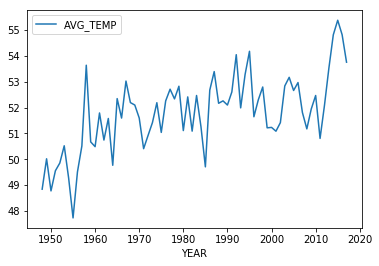

In [35]:
df['AVG_TEMP'] = (df['TMAX'] + df['TMIN']) // 2
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').mean().plot()

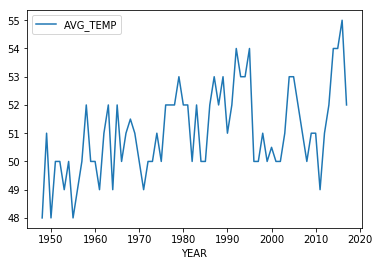

In [37]:
df[['YEAR', 'AVG_TEMP']].groupby('YEAR').median().plot()

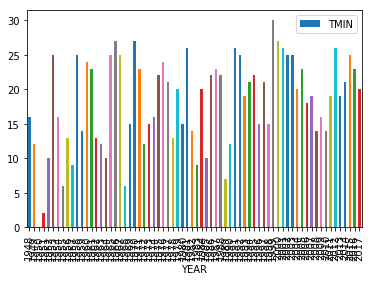

In [47]:
df[['YEAR', 'TMIN']].groupby(df.YEAR).min().plot(x='YEAR', y='TMIN', kind='bar')

In [23]:
df.head(3)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY_NAME,DAY_OF_WEEK,MONTH,YEAR,DAY,AVG_TEMP
0,1948-01-01,0.47,51,42,1,Thursday,4,1,1948,1,46
1,1948-01-02,0.59,45,36,1,Friday,5,1,1948,2,40
2,1948-01-03,0.42,45,35,1,Saturday,6,1,1948,3,40
